In [533]:
import sys
import os 
import openmc
import numpy as np
import matplotlib.pyplot as plt
import openmc.mgxs as mgxs
from IPython.display import Image
import glob
import pandas as pd
from prettytable import PrettyTable
import numpy as np
import matplotlib.pyplot as plt

### Choose problem number

In [558]:
pb_num_list=['2A','2B','2C','2D','2E','2F','2G','2H','2I','2K','2J','2L','2M','2N','2O','2P']


## Import OpenMC data

In [559]:
def import_output(pb_num):
    sp_file='/Users/pablogarcia44/repo/Garcia_OpenSn/benchmark/power/'+pb_num+'/sp_'+pb_num+'.h5'
    sm_file='/Users/pablogarcia44/repo/Garcia_OpenSn/benchmark/power/'+pb_num+'/sm_'+pb_num+'.h5'
    sm=openmc.Summary(sm_file)
    sp = openmc.StatePoint(sp_file)
    sp.link_with_summary(sm)
    model=openmc.model.Model
    model_file='/Users/pablogarcia44/repo/Garcia_OpenSn/benchmark/power/'+pb_num+'/model_'+pb_num+'.xml'
    model=openmc.model.Model.from_model_xml(model_file)
    return(model,sp,sm)

In [560]:
import_dict={}
for pb_num in pb_num_list:
        import_dict[pb_num]=[import_output(pb_num)[0],import_output(pb_num)[1],import_output(pb_num)[2]]

/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=1.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=2.
  warn(msg, IDWarning)
/opt/a

## Keff

### Create keff dict 

In [561]:
keff_dict_vera = {}
keff_dict_vera['2A'] = 1.182175 
keff_dict_vera['2B'] = 1.183360
keff_dict_vera['2C'] = 1.173751
keff_dict_vera['2D'] = 1.165591
keff_dict_vera['2E'] = 1.069627
keff_dict_vera['2F'] = 0.976018
keff_dict_vera['2G'] = 0.847695
keff_dict_vera['2H'] = 0.788221
keff_dict_vera['2I'] = 1.179916 
keff_dict_vera['2J'] = 0.975193
keff_dict_vera['2K'] = 1.020063
keff_dict_vera['2L'] = 1.018915
keff_dict_vera['2M'] = 0.938796
keff_dict_vera['2N'] = 0.869615
keff_dict_vera['2O'] = 1.047729
keff_dict_vera['2P'] = 0.927410

keff_dict_opensn = {}
keff_dict_opensn['2A'] = 1.182175 
keff_dict_opensn['2B'] = 1.183360
keff_dict_opensn['2C'] = 1.173751
keff_dict_opensn['2D'] = 1.165591
keff_dict_opensn['2E'] = 1.069627
keff_dict_opensn['2F'] = 0.976018
keff_dict_opensn['2G'] = 0.847695
keff_dict_opensn['2H'] = 0.788221
keff_dict_opensn['2I'] = 1.179916 
keff_dict_opensn['2J'] = 0.975193
keff_dict_opensn['2K'] = 1.020063
keff_dict_opensn['2L'] = 1.018915
keff_dict_opensn['2M'] = 0.938796
keff_dict_opensn['2N'] = 0.869615
keff_dict_opensn['2O'] = 1.047729
keff_dict_opensn['2P'] = 0.927410


keff_dict_paper = {}
keff_dict_paper['2A'] = -13.3
keff_dict_paper['2B'] = -23.2
keff_dict_paper['2C'] = 15.7
keff_dict_paper['2D'] = 50.8
keff_dict_paper['2E'] = -79.1
keff_dict_paper['2F'] = -124.6
keff_dict_paper['2G'] = -169.5
keff_dict_paper['2H'] = -187.8
keff_dict_paper['2I'] = -32.7 
keff_dict_paper['2J'] = -118.5
keff_dict_paper['2K'] = -112.7
keff_dict_paper['2L'] = -85.3
keff_dict_paper['2M'] = -64.6
keff_dict_paper['2N'] = -188.8
keff_dict_paper['2O'] = -74.5
keff_dict_paper['2P'] = -73.4

def create_dict_openmc():
    keff_dict_openmc = {}
    for pb_num in pb_num_list:
        keff_dict_openmc[pb_num] = import_output(pb_num)[1].k_combined.nominal_value
    return(keff_dict_openmc)

keff_dict_openmc=create_dict_openmc()




/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=1.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=2.
  warn(msg, IDWarning)
/opt/a

### Plot keff 

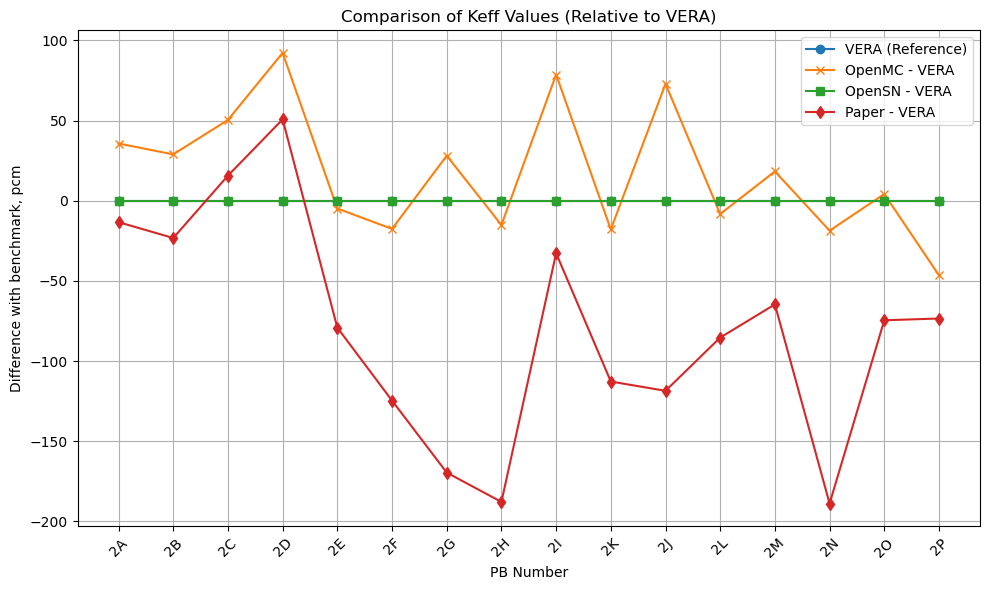

In [562]:
import matplotlib.pyplot as plt

def plot_keff_dicts(pb_num_list, keff_dict_vera, keff_dict_openmc, keff_dict_opensn, keff_dict_paper):
    # Calculate differences and multiply by 1e5 for OpenMC and OpenSN
    openmc_diff = [(keff_dict_openmc[key] - keff_dict_vera[key]) * 1e5 for key in pb_num_list]
    opensn_diff = [(keff_dict_opensn[key] - keff_dict_vera[key]) * 1e5 for key in pb_num_list]
    vera_diff = [0] * len(pb_num_list)  # Reference values (VERA - VERA = 0)
    
    # Paper differences (already a difference, so no multiplication)
    paper_diff = [keff_dict_paper[key] for key in pb_num_list]
    
    # Plot the values
    plt.figure(figsize=(10, 6))
    plt.plot(pb_num_list, vera_diff, label='VERA (Reference)', marker='o')
    plt.plot(pb_num_list, openmc_diff, label='OpenMC - VERA', marker='x')
    plt.plot(pb_num_list, opensn_diff, label='OpenSN - VERA', marker='s')
    plt.plot(pb_num_list, paper_diff, label='Paper - VERA', marker='d')
    
    # Adding labels and title
    plt.xlabel('PB Number')
    plt.ylabel('Difference with benchmark, pcm')
    plt.title('Comparison of Keff Values (Relative to VERA)')
    plt.legend()
    
    # Show grid and plot
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_keff_dicts(pb_num_list, keff_dict_vera, keff_dict_openmc, keff_dict_opensn, keff_dict_paper)


## Power Map

### Create power map for OpenMc

In [539]:
def get_tally(pb_num,tally_name):
    sp_tally=import_dict[pb_num][1].tallies
    for index, tally in enumerate(sp_tally):
        if index==0:
            t_power=sp_tally[tally]
    tally_power_reshaped =t_power.get_reshaped_data()
    if tally_name=='fission':
        return(np.array(tally_power_reshaped)[:, 0, 0])
        print('ok')
    if tally_name=='nu-fission':
        return(np.array(tally_power_reshaped)[:, 0, 1])
    if tally_name=='kappa-fission':
        return(np.array(tally_power_reshaped)[:, 0, 2])        

    

In [540]:
import numpy as np

def normal_shape(pb_num, tally_name):
    # Get the tally based on pb_num and tally_name
    tally = get_tally(pb_num, tally_name)
    
    # Convert the tally to a numpy array and reshape it
    tally_array = (np.array(tally).reshape((17, 17)))[-9:, :9]
    
    # Apply specific modifications to elements of the array
    tally_array[0, :] *= 2
    tally_array[:, -1] *= 2
    
    # Create a mask for non-zero values
    mask = tally_array > 0
    
    # Compute the sum considering only non-zero values
    sum_non_zero = np.sum(tally_array[mask])
    
    # Print debugging information
    # print("Modified Tally Array:\n", tally_array)
    # print("Mask:\n", mask)
    # print("Sum of non-zero values:", sum_non_zero)
    
    # Handle the case where sum_non_zero is zero to avoid division by zero
    if sum_non_zero == 0:
        # print("All values are zero or there are no non-zero values.")
        return np.zeros_like(tally_array)  # Return a zero array
    
    # Normalize the array so that the sum of all non-zero values equals 100%
    normalized_tally = np.where(mask, tally_array / sum_non_zero * 100, 0)
    
    # Calculate the average of the normalized values
    average_normalized = np.mean(normalized_tally[mask])
    
    # Adjust values so that the average is 1 (original units)
    if average_normalized != 0:
        adjustment_factor = 1 / average_normalized
    else:
        adjustment_factor = 0
    
    adjusted_tally = np.where(mask, normalized_tally * adjustment_factor, 0)
    
    # Print adjusted array for debugging
    # print("Adjusted Tally Array (with average = 1):\n", adjusted_tally)
    
    return adjusted_tally


### Create power map for benchmark

In [541]:
GT=[(5,2),(8,2),(3,3),(2,5),(5,5),(8,5),(2,8),(5,8)]
IT=[(8,8)]

In [542]:
A2=[1.0364, 1.0089, 
1.0371, 1.0093, 1.0104, 
1.0368, 1.0386, 
1.0353, 1.0089, 1.0118, 1.0451, 1.0313,
1.0328, 1.0053, 1.0089, 1.0458, 1.0516, 
1.0266, 1.0281, 1.0360, 1.0180, 0.9736, 
1.0122, 0.9880, 0.9880, 1.0115, 0.9837, 0.9649, 0.9483, 0.9389, 
0.9764, 0.9721, 0.9714, 0.9739, 0.9645, 0.9551, 0.9458, 0.9418, 0.9476]

B2=[1.0355, 1.0113,
1.0362, 1.0113, 1.0121, 
1.0359, 1.0373, 
1.0337, 1.0099, 1.0124, 1.0424, 1.0308, 
1.0308, 1.0066, 1.0095, 1.0427, 1.0474, 
1.0243, 1.0258, 1.0326, 1.0146, 0.9745, 
1.0103, 0.9893, 0.9893, 1.0099, 0.9839, 0.9666, 0.9503, 0.9406, 
0.9781, 0.9742, 0.9738, 0.9752, 0.9662, 0.9565, 0.9475, 0.9435, 0.9478]

C2=[1.0357, 1.0109, 
1.0364, 1.0113, 1.0124, 
1.0364, 1.0375, 
1.0346, 1.0102, 1.0124, 1.0422, 1.0306, 
1.0306, 1.0066, 1.0095, 1.0426, 1.0473, 
1.0248, 1.0259, 1.0324, 1.0150, 0.9738, 
1.0102, 0.9891, 0.9891, 1.0102, 0.9840, 0.9666, 0.9494, 0.9411, 
0.9782, 0.9742, 0.9738, 0.9753, 0.9658, 0.9564, 0.9476, 0.9433, 0.9476 ]

D2=[1.0360, 1.0115, 
1.0364, 1.0119, 1.0122, 
1.0364, 1.0379, 
1.0342, 1.0100, 1.0122, 1.0426, 1.0313, 
1.0305, 1.0067, 1.0097, 1.0419, 1.0474, 
1.0243, 1.0258, 1.0327, 1.0148, 0.9741, 
1.0111, 0.9895, 0.9891, 1.0100, 0.9836, 0.9657, 0.9499, 0.9404, 
0.9785, 0.9741, 0.9737, 0.9752, 0.9664, 0.9565, 0.9474, 0.9426, 0.9477]

E2=[1.0170, 0.9930, 
0.9299, 0.9635, 0.9962, 
0.9331, 1.0250, 
0.9347, 0.9695, 1.0022, 1.0362, 1.0290, 
1.0290, 1.0034, 0.9751, 0.9523, 1.0226, 
1.0350, 0.9419, 0.9579, 1.0426, 1.0314, 
1.0578, 1.0222, 0.9763, 0.9355, 0.9787, 1.0146, 1.0246, 1.0290, 
1.0346, 1.0238, 1.0054, 0.9938, 1.0054, 1.0218, 1.0314, 1.0398, 1.0514]

F2=[1.0783, 1.0428, 
0.9714, 0.9907, 0.9736, 
0.9333, 0.9262, 
0.9258, 0.9591, 0.9543, 0.9118, 0.9262, 
0.9280, 0.9617, 0.9587, 0.9127, 0.9070, 
0.9420, 0.9411, 0.9350, 0.9670, 1.0340, 
0.9744, 1.0047, 1.0060, 0.9793, 1.0191, 1.0502, 1.0831, 1.1094, 
1.0472, 1.0529, 1.0551, 1.0551, 1.0717, 1.0923, 1.1138, 1.1339, 1.1541] 

G2=[1.0732, 1.0353, 
0.9393, 0.9660, 0.9411,
0.8855, 0.8762, 
0.8736, 0.9200, 0.9138, 0.8529, 0.8719, 
0.8784, 0.9273, 0.9212, 0.8559, 0.8507, 
0.9083, 0.9072, 0.9070, 0.9646, 1.0707, 
0.9646, 1.0058, 1.0098, 0.9778, 1.0394, 1.0944, 1.1525, 1.1999, 
1.0707, 1.0803, 1.0858, 1.0899, 1.1202, 1.1585, 1.2005, 1.2363, 1.2666]

H2=[1.0607, 1.0215, 
0.9221, 0.9481, 0.9210, 
0.8646, 0.8547, 
0.8516, 0.9001, 0.8931, 0.8311, 0.8511, 
0.8589, 0.9093, 0.9032, 0.8361, 0.8344, 
0.8952, 0.8962, 0.9022, 0.9707, 1.0905, 
0.9609, 1.0041, 1.0104, 0.9802, 1.0495, 1.1144, 1.1840, 1.2416, 
1.0751, 1.0862, 1.0943, 1.1019, 1.1405, 1.1873, 1.2384, 1.2829, 1.3188]

I2=[1.0045, 0.9929, 
1.0251, 1.0023, 1.0073, 
1.0334, 1.0367, 
1.0352, 1.0088, 1.0117, 1.0450, 1.0327, 
1.0327, 1.0070, 1.0102, 1.0457, 1.0515, 
1.0269, 1.0287, 1.0370, 1.0189, 0.9755, 
1.0128, 0.9900, 0.9903, 1.0128, 0.9856, 0.9679, 0.9513, 0.9415, 
0.9791, 0.9748, 0.9748, 0.9759, 0.9679, 0.9574, 0.9487, 0.9444, 0.9502] 

J2=[1.0415, 1.0226, 
0.9590, 0.9823, 0.9683, 
0.9305, 0.9248, 
0.9262, 0.9590, 0.9555, 0.9130, 0.9288, 
0.9288, 0.9630, 0.9595, 0.9143, 0.9086, 
0.9428, 0.9428, 0.9371, 0.9696, 1.0358, 
0.9762, 1.0060, 1.0077, 0.9805, 1.0213, 1.0529, 1.0849, 1.1121, 
1.0489, 1.0555, 1.0577, 1.0577, 1.0744, 1.0941, 1.1160, 1.1362, 1.1559]

K2=[0.9765, 1.0637, 
0.9899, 1.0055, 0.9849, 
0.9455, 0.9388, 
0.9380, 0.9690, 0.9644, 0.9237, 0.9388, 
0.9388, 0.9707, 0.9673, 0.9246, 0.9195, 
0.9510, 0.9505, 0.9476, 0.9807, 1.0495, 
0.9811, 1.0105, 1.0122, 0.9874, 1.0285, 1.0645, 1.1073, 1.0159, 
1.0524, 1.0578, 1.0608, 1.0620, 1.0813, 1.1098, 1.0147, 1.0453, 1.0687]

L2=[0.9481, 0.9967, 
1.0328, 1.0001, 0.9313,
0.9556, 1.0286, 
0.9606, 1.0093, 1.0106, 0.9409, 0.9816, 
1.0475, 1.0219, 1.0160, 0.9405, 0.9388, 
0.9690, 1.0466, 0.9544, 1.0332, 0.9388, 
0.9644, 1.0198, 1.0273, 0.9648, 1.0152, 1.0223, 1.0093, 1.0076, 
1.0311, 1.0362, 1.0383, 1.0307, 1.0341, 1.0353, 1.0257, 1.0026, 0.9053]

M2=[0.9833, 1.0389, 
0.9846, 1.0393, 1.0389, 
0.9833, 0.9824, 
0.9828, 1.0370, 1.0361, 0.9760, 1.0206, 
0.9814, 1.0361, 1.0343, 0.9714, 0.9696, 
0.9769, 0.9778, 0.9696, 0.9659, 1.0042, 
0.9728, 1.0193, 1.0297, 0.9792, 1.0170, 1.0170, 0.9441, 1.0152, 
1.0079, 0.9432, 1.0334, 1.0288, 0.9473, 1.0325, 1.0361, 1.0306, 0.9423]

N2=[0.9756, 1.0258,
0.8993, 0.9963, 1.0209, 
0.8923, 0.9657, 
0.8697, 0.9722, 1.0057, 0.9468, 0.9557, 
0.8678, 0.9644, 0.9700, 0.8651, 0.8467, 
0.8819, 0.8831, 0.8705, 0.9111, 1.0554, 
0.9247, 1.0155, 1.0180, 0.9318, 1.0367, 1.0824, 1.1272, 1.1538, 
1.0800, 1.0928, 1.0962, 1.0923, 1.1184, 1.1459, 1.1661, 1.1602, 1.0603]

O2=[1.1049, 1.0710, 
1.0889, 1.0502, 1.0180, 
1.0408, 0.9805, 
1.0478, 0.9658, 0.2175, 0.9882, 1.0367, 
1.0726, 1.0225, 0.9772, 1.0555, 1.0812, 
1.0926, 1.0824, 1.0788, 0.9931, 0.2173, 
1.1053, 1.0779, 1.0722, 1.0918, 1.0478, 0.9931, 0.9254, 0.9641, 
1.0771, 1.0714, 1.0677, 1.0637, 1.0429, 1.0168, 0.9935, 0.9996, 1.0164]

P2=[1.1688, 1.1116, 
1.1411, 1.0530, 0.2442, 
1.1180, 1.0636, 
1.0659, 1.0821, 1.0881, 1.0627, 0.2443, 
0.2459, 1.0401, 1.0950, 1.1088, 1.0608, 
1.1148, 1.1070, 1.0807, 1.0378, 0.2431, 
1.1476, 1.1088, 1.0332, 0.2440, 1.0078, 1.0406, 1.0050, 1.0608, 
1.1337, 1.1143, 1.0641, 0.9954, 1.0438, 1.0751, 1.0821, 1.1051, 1.1300]

Q2=[1.0368, 1.0105, 
1.0371, 1.0113, 1.0120, 
1.0375, 1.0389, 
1.0353, 1.0098, 1.0124, 1.0448, 1.0331, 
1.0320, 1.0069, 1.0098, 1.0448, 1.0513, 
1.0258, 1.0273, 1.0357, 1.0160, 0.9726,
1.0113, 0.9883, 0.9879, 1.0109, 0.9828, 0.9639, 0.9468, 0.9369, 
0.9774, 0.9726, 0.9723, 0.9745, 0.9646, 0.9548, 0.9457, 0.9413, 0.9479] 

In [543]:
def map_bench(bench_list):
    bench_result=[]
    pos=[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [2, 2], [3, 2], [4, 2], [6, 2], [7, 2], [4, 3], [5, 3], [6, 3], [7, 3], [8, 3], [4, 4], [5, 4], [6, 4], [7, 4], [8, 4], [6, 5], [7, 5], [6, 6], [7, 6], [8, 6], [7, 7], [8, 7]]
    pos.reverse()
    for k in range(len(bench_list)):
        bench_result.append([pos[k][0],pos[k][1],bench_list[k]])
    return(bench_result)

power_dict = {}
power_dict['2A'] = map_bench(A2)
power_dict['2B'] = map_bench(B2)
power_dict['2C'] = map_bench(C2)
power_dict['2D'] = map_bench(D2)
power_dict['2E'] = map_bench(E2)
power_dict['2F'] = map_bench(F2)
power_dict['2G'] = map_bench(G2)
power_dict['2H'] = map_bench(H2)
power_dict['2I'] = map_bench(I2)
power_dict['2J'] = map_bench(J2)
power_dict['2K'] = map_bench(K2)
power_dict['2L'] = map_bench(L2)
power_dict['2M'] = map_bench(M2)
power_dict['2N'] = map_bench(N2)
power_dict['2O'] = map_bench(O2)
power_dict['2P'] = map_bench(P2)
power_dict['2Q'] = map_bench(A2)


In [544]:
print(power_dict['2A'])

[[8, 7, 1.0364], [7, 7, 1.0089], [8, 6, 1.0371], [7, 6, 1.0093], [6, 6, 1.0104], [7, 5, 1.0368], [6, 5, 1.0386], [8, 4, 1.0353], [7, 4, 1.0089], [6, 4, 1.0118], [5, 4, 1.0451], [4, 4, 1.0313], [8, 3, 1.0328], [7, 3, 1.0053], [6, 3, 1.0089], [5, 3, 1.0458], [4, 3, 1.0516], [7, 2, 1.0266], [6, 2, 1.0281], [4, 2, 1.036], [3, 2, 1.018], [2, 2, 0.9736], [8, 1, 1.0122], [7, 1, 0.988], [6, 1, 0.988], [5, 1, 1.0115], [4, 1, 0.9837], [3, 1, 0.9649], [2, 1, 0.9483], [1, 1, 0.9389], [8, 0, 0.9764], [7, 0, 0.9721], [6, 0, 0.9714], [5, 0, 0.9739], [4, 0, 0.9645], [3, 0, 0.9551], [2, 0, 0.9458], [1, 0, 0.9418], [0, 0, 0.9476]]


In [545]:
def generate_and_flip_matrix(data, size=9):
    """
    Crée une matrice de taille `size x size` à partir des données fournies.
    Les positions sans données spécifiques seront remplies avec des zéros.
    Les lignes sont inversées pour que la première ligne soit en bas.
    """
    # Crée un tableau de zéros de taille size x size
    matrix = np.zeros((size, size))
    
    for x, y, value in data:
        matrix[x, y] = value
        matrix[y, x] = value  # Ajoute la symétrie
    
    # Inverse les lignes pour que la première ligne soit en bas
    matrix = np.flipud(matrix)
    
    return matrix

### Create OpenSn power map

In [546]:
power_dict_opensn_raw = {}
power_dict_opensn_raw['2A'] = """
val_table[1][1] = 0.08
val_table[1][2] = 0.08
val_table[1][3] = 0.09
val_table[1][4] = 0.09
val_table[1][5] = 0.10
val_table[1][6] = 0.10
val_table[1][7] = 0.10
val_table[1][8] = 0.10
val_table[1][9] = 0.10
val_table[1][10] = 0.10
val_table[1][11] = 0.10
val_table[1][12] = 0.10
val_table[1][13] = 0.10
val_table[1][14] = 0.09
val_table[1][15] = 0.08
val_table[1][16] = 0.08
val_table[1][17] = 0.04
val_table[2][1] = 0.08
val_table[2][2] = 0.08
val_table[2][3] = 0.08
val_table[2][4] = 0.09
val_table[2][5] = 0.10
val_table[2][6] = 0.10
val_table[2][7] = 0.10
val_table[2][8] = 0.10
val_table[2][9] = 0.11
val_table[2][10] = 0.10
val_table[2][11] = 0.11
val_table[2][12] = 0.11
val_table[2][13] = 0.10
val_table[2][14] = 0.09
val_table[2][15] = 0.08
val_table[2][16] = 0.08
val_table[2][17] = 0.04
val_table[3][1] = 0.08
val_table[3][2] = 0.08
val_table[3][3] = 0.09
val_table[3][4] = 0.09
val_table[3][5] = 0.10
val_table[3][6] = -1.00
val_table[3][7] = 0.10
val_table[3][8] = 0.10
val_table[3][9] = -1.00
val_table[3][10] = 0.10
val_table[3][11] = 0.11
val_table[3][12] = -1.00
val_table[3][13] = 0.10
val_table[3][14] = 0.09
val_table[3][15] = 0.08
val_table[3][16] = 0.07
val_table[3][17] = 0.04
val_table[4][1] = 0.08
val_table[4][2] = 0.08
val_table[4][3] = 0.09
val_table[4][4] = -1.00
val_table[4][5] = 0.09
val_table[4][6] = 0.10
val_table[4][7] = 0.09
val_table[4][8] = 0.09
val_table[4][9] = 0.09
val_table[4][10] = 0.09
val_table[4][11] = 0.10
val_table[4][12] = 0.10
val_table[4][13] = 0.10
val_table[4][14] = -1.00
val_table[4][15] = 0.08
val_table[4][16] = 0.07
val_table[4][17] = 0.04
val_table[5][1] = 0.08
val_table[5][2] = 0.08
val_table[5][3] = 0.09
val_table[5][4] = 0.09
val_table[5][5] = 0.09
val_table[5][6] = 0.10
val_table[5][7] = 0.10
val_table[5][8] = 0.10
val_table[5][9] = 0.10
val_table[5][10] = 0.09
val_table[5][11] = 0.10
val_table[5][12] = 0.10
val_table[5][13] = 0.10
val_table[5][14] = 0.09
val_table[5][15] = 0.09
val_table[5][16] = 0.08
val_table[5][17] = 0.04
val_table[6][1] = 0.08
val_table[6][2] = 0.08
val_table[6][3] = -1.00
val_table[6][4] = 0.08
val_table[6][5] = 0.09
val_table[6][6] = -1.00
val_table[6][7] = 0.10
val_table[6][8] = 0.09
val_table[6][9] = -1.00
val_table[6][10] = 0.09
val_table[6][11] = 0.09
val_table[6][12] = -1.00
val_table[6][13] = 0.09
val_table[6][14] = 0.09
val_table[6][15] = -1.00
val_table[6][16] = 0.08
val_table[6][17] = 0.04
val_table[7][1] = 0.08
val_table[7][2] = 0.08
val_table[7][3] = 0.08
val_table[7][4] = 0.08
val_table[7][5] = 0.08
val_table[7][6] = 0.09
val_table[7][7] = 0.09
val_table[7][8] = 0.09
val_table[7][9] = 0.08
val_table[7][10] = 0.08
val_table[7][11] = 0.08
val_table[7][12] = 0.08
val_table[7][13] = 0.08
val_table[7][14] = 0.09
val_table[7][15] = 0.08
val_table[7][16] = 0.08
val_table[7][17] = 0.04
val_table[8][1] = 0.08
val_table[8][2] = 0.08
val_table[8][3] = 0.08
val_table[8][4] = 0.08
val_table[8][5] = 0.08
val_table[8][6] = 0.08
val_table[8][7] = 0.08
val_table[8][8] = 0.08
val_table[8][9] = 0.08
val_table[8][10] = 0.08
val_table[8][11] = 0.09
val_table[8][12] = 0.09
val_table[8][13] = 0.08
val_table[8][14] = 0.09
val_table[8][15] = 0.09
val_table[8][16] = 0.08
val_table[8][17] = 0.04
val_table[9][1] = 0.08
val_table[9][2] = 0.09
val_table[9][3] = -1.00
val_table[9][4] = 0.07
val_table[9][5] = 0.08
val_table[9][6] = -1.00
val_table[9][7] = 0.08
val_table[9][8] = 0.08
val_table[9][9] = -1.00
val_table[9][10] = 0.08
val_table[9][11] = 0.08
val_table[9][12] = -1.00
val_table[9][13] = 0.08
val_table[9][14] = 0.09
val_table[9][15] = -1.00
val_table[9][16] = 0.08
val_table[9][17] = 0.04
val_table[10][1] = 0.08
val_table[10][2] = 0.08
val_table[10][3] = 0.08
val_table[10][4] = 0.07
val_table[10][5] = 0.07
val_table[10][6] = 0.07
val_table[10][7] = 0.07
val_table[10][8] = 0.08
val_table[10][9] = 0.08
val_table[10][10] = 0.08
val_table[10][11] = 0.08
val_table[10][12] = 0.08
val_table[10][13] = 0.08
val_table[10][14] = 0.09
val_table[10][15] = 0.09
val_table[10][16] = 0.08
val_table[10][17] = 0.04
val_table[11][1] = 0.08
val_table[11][2] = 0.08
val_table[11][3] = 0.08
val_table[11][4] = 0.08
val_table[11][5] = 0.08
val_table[11][6] = 0.08
val_table[11][7] = 0.07
val_table[11][8] = 0.08
val_table[11][9] = 0.08
val_table[11][10] = 0.08
val_table[11][11] = 0.08
val_table[11][12] = 0.09
val_table[11][13] = 0.08
val_table[11][14] = 0.09
val_table[11][15] = 0.09
val_table[11][16] = 0.08
val_table[11][17] = 0.04
val_table[12][1] = 0.08
val_table[12][2] = 0.08
val_table[12][3] = -1.00
val_table[12][4] = 0.08
val_table[12][5] = 0.08
val_table[12][6] = -1.00
val_table[12][7] = 0.07
val_table[12][8] = 0.08
val_table[12][9] = -1.00
val_table[12][10] = 0.08
val_table[12][11] = 0.08
val_table[12][12] = -1.00
val_table[12][13] = 0.08
val_table[12][14] = 0.09
val_table[12][15] = -1.00
val_table[12][16] = 0.08
val_table[12][17] = 0.04
val_table[13][1] = 0.07
val_table[13][2] = 0.08
val_table[13][3] = 0.08
val_table[13][4] = 0.08
val_table[13][5] = 0.07
val_table[13][6] = 0.07
val_table[13][7] = 0.07
val_table[13][8] = 0.07
val_table[13][9] = 0.08
val_table[13][10] = 0.08
val_table[13][11] = 0.08
val_table[13][12] = 0.08
val_table[13][13] = 0.08
val_table[13][14] = 0.09
val_table[13][15] = 0.08
val_table[13][16] = 0.07
val_table[13][17] = 0.04
val_table[14][1] = 0.07
val_table[14][2] = 0.07
val_table[14][3] = 0.08
val_table[14][4] = -1.00
val_table[14][5] = 0.08
val_table[14][6] = 0.07
val_table[14][7] = 0.07
val_table[14][8] = 0.07
val_table[14][9] = 0.08
val_table[14][10] = 0.07
val_table[14][11] = 0.08
val_table[14][12] = 0.08
val_table[14][13] = 0.08
val_table[14][14] = -1.00
val_table[14][15] = 0.07
val_table[14][16] = 0.06
val_table[14][17] = 0.03
val_table[15][1] = 0.07
val_table[15][2] = 0.07
val_table[15][3] = 0.07
val_table[15][4] = 0.07
val_table[15][5] = 0.07
val_table[15][6] = -1.00
val_table[15][7] = 0.07
val_table[15][8] = 0.07
val_table[15][9] = -1.00
val_table[15][10] = 0.07
val_table[15][11] = 0.08
val_table[15][12] = -1.00
val_table[15][13] = 0.07
val_table[15][14] = 0.07
val_table[15][15] = 0.06
val_table[15][16] = 0.06
val_table[15][17] = 0.03
val_table[16][1] = 0.07
val_table[16][2] = 0.06
val_table[16][3] = 0.06
val_table[16][4] = 0.06
val_table[16][5] = 0.06
val_table[16][6] = 0.07
val_table[16][7] = 0.07
val_table[16][8] = 0.07
val_table[16][9] = 0.07
val_table[16][10] = 0.07
val_table[16][11] = 0.07
val_table[16][12] = 0.07
val_table[16][13] = 0.07
val_table[16][14] = 0.06
val_table[16][15] = 0.06
val_table[16][16] = 0.06
val_table[16][17] = 0.03
val_table[17][1] = 0.04
val_table[17][2] = 0.04
val_table[17][3] = 0.03
val_table[17][4] = 0.03
val_table[17][5] = 0.03
val_table[17][6] = 0.04
val_table[17][7] = 0.04
val_table[17][8] = 0.04
val_table[17][9] = 0.04
val_table[17][10] = 0.04
val_table[17][11] = 0.04
val_table[17][12] = 0.04
val_table[17][13] = 0.03
val_table[17][14] = 0.03
val_table[17][15] = 0.03
val_table[17][16] = 0.03
val_table[17][17] = 0.02
"""
power_dict_opensn_raw['2B'] = 1.183360
power_dict_opensn_raw['2C'] = 1.173751
power_dict_opensn_raw['2D'] = 1.165591
power_dict_opensn_raw['2E'] = 1.069627
power_dict_opensn_raw['2F'] = 0.976018
power_dict_opensn_raw['2G'] = 0.847695
power_dict_opensn_raw['2H'] = 0.788221
power_dict_opensn_raw['2I'] = 1.179916 
power_dict_opensn_raw['2J'] = '''
val_table[1][1] = 0.08
val_table[1][2] = 0.08
val_table[1][3] = 0.09
val_table[1][4] = 0.09
val_table[1][5] = 0.10
val_table[1][6] = 0.10
val_table[1][7] = 0.10
val_table[1][8] = 0.10
val_table[1][9] = 0.10
val_table[1][10] = 0.10
val_table[1][11] = 0.10
val_table[1][12] = 0.10
val_table[1][13] = 0.10
val_table[1][14] = 0.09
val_table[1][15] = 0.08
val_table[1][16] = 0.08
val_table[1][17] = 0.04
val_table[2][1] = 0.08
val_table[2][2] = 0.08
val_table[2][3] = 0.08
val_table[2][4] = 0.09
val_table[2][5] = 0.10
val_table[2][6] = 0.10
val_table[2][7] = 0.10
val_table[2][8] = 0.10
val_table[2][9] = 0.11
val_table[2][10] = 0.10
val_table[2][11] = 0.11
val_table[2][12] = 0.11
val_table[2][13] = 0.10
val_table[2][14] = 0.09
val_table[2][15] = 0.08
val_table[2][16] = 0.08
val_table[2][17] = 0.04
val_table[3][1] = 0.08
val_table[3][2] = 0.08
val_table[3][3] = 0.09
val_table[3][4] = 0.09
val_table[3][5] = 0.10
val_table[3][6] = -1.00
val_table[3][7] = 0.10
val_table[3][8] = 0.10
val_table[3][9] = -1.00
val_table[3][10] = 0.10
val_table[3][11] = 0.11
val_table[3][12] = -1.00
val_table[3][13] = 0.10
val_table[3][14] = 0.09
val_table[3][15] = 0.08
val_table[3][16] = 0.07
val_table[3][17] = 0.04
val_table[4][1] = 0.08
val_table[4][2] = 0.08
val_table[4][3] = 0.09
val_table[4][4] = -1.00
val_table[4][5] = 0.09
val_table[4][6] = 0.10
val_table[4][7] = 0.09
val_table[4][8] = 0.09
val_table[4][9] = 0.09
val_table[4][10] = 0.09
val_table[4][11] = 0.10
val_table[4][12] = 0.10
val_table[4][13] = 0.10
val_table[4][14] = -1.00
val_table[4][15] = 0.08
val_table[4][16] = 0.07
val_table[4][17] = 0.04
val_table[5][1] = 0.08
val_table[5][2] = 0.08
val_table[5][3] = 0.09
val_table[5][4] = 0.09
val_table[5][5] = 0.09
val_table[5][6] = 0.10
val_table[5][7] = 0.10
val_table[5][8] = 0.10
val_table[5][9] = 0.10
val_table[5][10] = 0.09
val_table[5][11] = 0.10
val_table[5][12] = 0.10
val_table[5][13] = 0.10
val_table[5][14] = 0.09
val_table[5][15] = 0.09
val_table[5][16] = 0.08
val_table[5][17] = 0.04
val_table[6][1] = 0.08
val_table[6][2] = 0.08
val_table[6][3] = -1.00
val_table[6][4] = 0.08
val_table[6][5] = 0.09
val_table[6][6] = -1.00
val_table[6][7] = 0.10
val_table[6][8] = 0.09
val_table[6][9] = -1.00
val_table[6][10] = 0.09
val_table[6][11] = 0.09
val_table[6][12] = -1.00
val_table[6][13] = 0.09
val_table[6][14] = 0.09
val_table[6][15] = -1.00
val_table[6][16] = 0.08
val_table[6][17] = 0.04
val_table[7][1] = 0.08
val_table[7][2] = 0.08
val_table[7][3] = 0.08
val_table[7][4] = 0.08
val_table[7][5] = 0.08
val_table[7][6] = 0.09
val_table[7][7] = 0.09
val_table[7][8] = 0.09
val_table[7][9] = 0.08
val_table[7][10] = 0.08
val_table[7][11] = 0.08
val_table[7][12] = 0.08
val_table[7][13] = 0.08
val_table[7][14] = 0.09
val_table[7][15] = 0.08
val_table[7][16] = 0.08
val_table[7][17] = 0.04
val_table[8][1] = 0.08
val_table[8][2] = 0.08
val_table[8][3] = 0.08
val_table[8][4] = 0.08
val_table[8][5] = 0.08
val_table[8][6] = 0.08
val_table[8][7] = 0.08
val_table[8][8] = 0.08
val_table[8][9] = 0.08
val_table[8][10] = 0.08
val_table[8][11] = 0.09
val_table[8][12] = 0.09
val_table[8][13] = 0.08
val_table[8][14] = 0.09
val_table[8][15] = 0.09
val_table[8][16] = 0.08
val_table[8][17] = 0.04
val_table[9][1] = 0.08
val_table[9][2] = 0.09
val_table[9][3] = -1.00
val_table[9][4] = 0.07
val_table[9][5] = 0.08
val_table[9][6] = -1.00
val_table[9][7] = 0.08
val_table[9][8] = 0.08
val_table[9][9] = -1.00
val_table[9][10] = 0.08
val_table[9][11] = 0.08
val_table[9][12] = -1.00
val_table[9][13] = 0.08
val_table[9][14] = 0.09
val_table[9][15] = -1.00
val_table[9][16] = 0.08
val_table[9][17] = 0.04
val_table[10][1] = 0.08
val_table[10][2] = 0.08
val_table[10][3] = 0.08
val_table[10][4] = 0.07
val_table[10][5] = 0.07
val_table[10][6] = 0.07
val_table[10][7] = 0.07
val_table[10][8] = 0.08
val_table[10][9] = 0.08
val_table[10][10] = 0.08
val_table[10][11] = 0.08
val_table[10][12] = 0.08
val_table[10][13] = 0.08
val_table[10][14] = 0.09
val_table[10][15] = 0.09
val_table[10][16] = 0.08
val_table[10][17] = 0.04
val_table[11][1] = 0.08
val_table[11][2] = 0.08
val_table[11][3] = 0.08
val_table[11][4] = 0.08
val_table[11][5] = 0.08
val_table[11][6] = 0.08
val_table[11][7] = 0.07
val_table[11][8] = 0.08
val_table[11][9] = 0.08
val_table[11][10] = 0.08
val_table[11][11] = 0.08
val_table[11][12] = 0.09
val_table[11][13] = 0.08
val_table[11][14] = 0.09
val_table[11][15] = 0.09
val_table[11][16] = 0.08
val_table[11][17] = 0.04
val_table[12][1] = 0.08
val_table[12][2] = 0.08
val_table[12][3] = -1.00
val_table[12][4] = 0.08
val_table[12][5] = 0.08
val_table[12][6] = -1.00
val_table[12][7] = 0.07
val_table[12][8] = 0.08
val_table[12][9] = -1.00
val_table[12][10] = 0.08
val_table[12][11] = 0.08
val_table[12][12] = -1.00
val_table[12][13] = 0.08
val_table[12][14] = 0.09
val_table[12][15] = -1.00
val_table[12][16] = 0.08
val_table[12][17] = 0.04
val_table[13][1] = 0.07
val_table[13][2] = 0.08
val_table[13][3] = 0.08
val_table[13][4] = 0.08
val_table[13][5] = 0.07
val_table[13][6] = 0.07
val_table[13][7] = 0.07
val_table[13][8] = 0.07
val_table[13][9] = 0.08
val_table[13][10] = 0.08
val_table[13][11] = 0.08
val_table[13][12] = 0.08
val_table[13][13] = 0.08
val_table[13][14] = 0.09
val_table[13][15] = 0.08
val_table[13][16] = 0.07
val_table[13][17] = 0.04
val_table[14][1] = 0.07
val_table[14][2] = 0.07
val_table[14][3] = 0.08
val_table[14][4] = -1.00
val_table[14][5] = 0.08
val_table[14][6] = 0.07
val_table[14][7] = 0.07
val_table[14][8] = 0.07
val_table[14][9] = 0.08
val_table[14][10] = 0.07
val_table[14][11] = 0.08
val_table[14][12] = 0.08
val_table[14][13] = 0.08
val_table[14][14] = -1.00
val_table[14][15] = 0.07
val_table[14][16] = 0.06
val_table[14][17] = 0.03
val_table[15][1] = 0.07
val_table[15][2] = 0.07
val_table[15][3] = 0.07
val_table[15][4] = 0.07
val_table[15][5] = 0.07
val_table[15][6] = -1.00
val_table[15][7] = 0.07
val_table[15][8] = 0.07
val_table[15][9] = -1.00
val_table[15][10] = 0.07
val_table[15][11] = 0.08
val_table[15][12] = -1.00
val_table[15][13] = 0.07
val_table[15][14] = 0.07
val_table[15][15] = 0.06
val_table[15][16] = 0.06
val_table[15][17] = 0.03
val_table[16][1] = 0.07
val_table[16][2] = 0.06
val_table[16][3] = 0.06
val_table[16][4] = 0.06
val_table[16][5] = 0.06
val_table[16][6] = 0.07
val_table[16][7] = 0.07
val_table[16][8] = 0.07
val_table[16][9] = 0.07
val_table[16][10] = 0.07
val_table[16][11] = 0.07
val_table[16][12] = 0.07
val_table[16][13] = 0.07
val_table[16][14] = 0.06
val_table[16][15] = 0.06
val_table[16][16] = 0.06
val_table[16][17] = 0.03
val_table[17][1] = 0.04
val_table[17][2] = 0.04
val_table[17][3] = 0.03
val_table[17][4] = 0.03
val_table[17][5] = 0.03
val_table[17][6] = 0.04
val_table[17][7] = 0.04
val_table[17][8] = 0.04
val_table[17][9] = 0.04
val_table[17][10] = 0.04
val_table[17][11] = 0.04
val_table[17][12] = 0.04
val_table[17][13] = 0.03
val_table[17][14] = 0.03
val_table[17][15] = 0.03
val_table[17][16] = 0.03
val_table[17][17] = 0.02'''
power_dict_opensn_raw['2K'] = 1.020063
power_dict_opensn_raw['2L'] = 1.018915
power_dict_opensn_raw['2M'] = 0.938796
power_dict_opensn_raw['2N'] = 0.869615
power_dict_opensn_raw['2O'] = 1.047729
power_dict_opensn_raw['2P'] = 0.927410

In [547]:
import numpy as np
import re

def text_to_numpy_array(text):
    """
    Convertit un texte de valeurs tabulaires copié-collé en tableau numpy.
    
    Parameters:
    - text (str): Texte avec des valeurs tabulaires au format `val_table[i][j] = value`.
    
    Returns:
    - numpy.ndarray: Tableau numpy contenant les valeurs.
    """
    # Trouver toutes les occurrences de `val_table[i][j] = value` dans le texte
    pattern = r"val_table\[(\d+)\]\[(\d+)\] = ([\d.-]+)"
    matches = re.findall(pattern, text)
    
    # Extraire les données et déterminer la taille du tableau
    rows = {}
    for match in matches:
        row_idx, col_idx, value = int(match[0]) - 1, int(match[1]) - 1, float(match[2])
        if row_idx not in rows:
            rows[row_idx] = {}
        rows[row_idx][col_idx] = value
    
    # Trouver le nombre total de lignes et de colonnes
    num_rows = max(rows.keys()) + 1
    num_cols = max(max(cols.keys()) for cols in rows.values()) + 1
    
    # Créer le tableau numpy avec les valeurs
    array = np.full((num_rows, num_cols), np.nan)
    for row_idx, cols in rows.items():
        for col_idx, value in cols.items():
            array[row_idx, col_idx] = value
    
    return array

def extract_subarray(array, start_row, start_col, size):
    """
    Extrait un sous-tableau carré d'une taille spécifiée à partir d'un tableau numpy.
    
    Parameters:
    - array (numpy.ndarray): Tableau d'origine.
    - start_row (int): Indice de la ligne de départ pour l'extraction.
    - start_col (int): Indice de la colonne de départ pour l'extraction.
    - size (int): Taille du sous-tableau (doit être un carré).
    
    Returns:
    - numpy.ndarray: Sous-tableau extrait.
    """
    return array[start_row:start_row+size, start_col:start_col+size]

def reverse_rows(array):
    """
    Renverse l'ordre des lignes dans un tableau numpy.
    
    Parameters:
    - array (numpy.ndarray): Tableau à renverser.
    
    Returns:
    - numpy.ndarray: Tableau avec l'ordre des lignes renversé.
    """
    return np.flipud(array)

def replace_negatives_with_zeros(array):
    """
    Remplace toutes les occurrences de -1 par 0 dans un tableau numpy.
    
    Parameters:
    - array (numpy.ndarray): Tableau dans lequel remplacer les valeurs.
    
    Returns:
    - numpy.ndarray: Tableau avec les valeurs -1 remplacées par 0.
    """
    return np.where(array == -1, 0, array)

def adjust_array(array, size):
    """
    Ajuste un tableau numpy selon des spécifications: extrait un sous-tableau, renverse les lignes, remplace les négatifs par zéro,
    normalise et ajuste les valeurs pour que la moyenne des valeurs non nulles soit 1.
    
    Parameters:
    - array (numpy.ndarray): Tableau d'origine.
    - size (int): Taille du sous-tableau.
    
    Returns:
    - numpy.ndarray: Tableau ajusté.
    """
    # Extraire le sous-tableau
    subarray = extract_subarray(array, 0, 0, size)

    # Renverser les lignes
    subarray = reverse_rows(subarray)

    # Remplacer les valeurs négatives par zéro
    subarray = replace_negatives_with_zeros(subarray)

    # Calculer la somme des valeurs non nulles
    non_zero_sum = np.sum(subarray[subarray != 0])

    # Normaliser
    normalized_array = np.where(subarray != 0, subarray / non_zero_sum, 0)

    # Ajuster pour que la moyenne des valeurs non nulles soit 1
    mean_non_zero = np.mean(normalized_array[normalized_array != 0])
    adjustment_factor = 1 / mean_non_zero
    adjusted_array = np.where(subarray != 0, normalized_array * adjustment_factor, 0)

    return adjusted_array


full_array = text_to_numpy_array(power_dict_opensn_raw['2A'])
adjusted_array = adjust_array(full_array, 9)  # Taille du sous-tableau 9x9
print(adjusted_array)

[[0.90995261 1.02369668 0.         0.79620853 0.90995261 0.
  0.90995261 0.90995261 0.        ]
 [0.90995261 0.90995261 0.90995261 0.90995261 0.90995261 0.90995261
  0.90995261 0.90995261 0.90995261]
 [0.90995261 0.90995261 0.90995261 0.90995261 0.90995261 1.02369668
  1.02369668 1.02369668 0.90995261]
 [0.90995261 0.90995261 0.         0.90995261 1.02369668 0.
  1.13744076 1.02369668 0.        ]
 [0.90995261 0.90995261 1.02369668 1.02369668 1.02369668 1.13744076
  1.13744076 1.13744076 1.13744076]
 [0.90995261 0.90995261 1.02369668 0.         1.02369668 1.13744076
  1.02369668 1.02369668 1.02369668]
 [0.90995261 0.90995261 1.02369668 1.02369668 1.13744076 0.
  1.13744076 1.13744076 0.        ]
 [0.90995261 0.90995261 0.90995261 1.02369668 1.13744076 1.13744076
  1.13744076 1.13744076 1.25118483]
 [0.90995261 0.90995261 1.02369668 1.02369668 1.13744076 1.13744076
  1.13744076 1.13744076 1.13744076]]


### Create power map dict

In [548]:
def create_dict_power_vera():
    power_dict_opensn = {}
    for pb_num in pb_num_list:
        power_dict_opensn[pb_num] = generate_and_flip_matrix(power_dict[pb_num])
    return(power_dict_opensn)
power_dict_openmc=create_dict_power_vera()

In [549]:
def create_dict_power_openmc():
    power_dict_openmc = {}
    for pb_num in pb_num_list:
        power_dict_openmc[pb_num] = normal_shape(pb_num,'fission')
    return(power_dict_openmc)
power_dict_openmc=create_dict_power_openmc()

In [550]:
def create_dict_power_opensn():
    power_dict_opensn = {}
    for pb_num in pb_num_list:
        full_array = text_to_numpy_array(power_dict_opensn_raw[pb_num])
        adjusted_array = adjust_array(full_array, 9)  
        power_dict_opensn[pb_num] = adjusted_array
    return(power_dict_opensn)
power_dict_opensn=create_dict_power_opensn()

### Plot Map power

In [555]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def create_custom_colormap():
    # Créer un colormap allant de bleu foncé à bleu clair, puis à vert, jaune, orange et rouge
    cmap = mcolors.LinearSegmentedColormap.from_list(
        'blue_red', ['darkblue', 'lightblue', 'lightgreen', 'yellow', 'orange', 'red']
    )
    
    return cmap

def apply_colormap(data, cmap):
    # Créer une image avec les valeurs normalisées
    img = np.zeros(data.shape + (4,))
    
    # Normaliser les valeurs entre 0.9 et 1.1 pour s'adapter au colormap
    min_val, max_val = 0.95, 1.05
    normalized_data = np.clip((data - min_val) / (max_val - min_val), 0, 1)  # Normaliser entre 0 et 1
    
    # Appliquer le colormap
    img[:] = cmap(normalized_data)
    
    # Appliquer la couleur noire pour les valeurs égales à 0
    mask_black = (data == 0)
    img[mask_black] = [0, 0, 0, 1]  # RGBA pour le noir

    return img

def plot_power(data):
    # Créer le colormap personnalisé
    cmap = create_custom_colormap()

    # Obtenir les données normalisées (assurez-vous que cette fonction existe)
 
    
    # Appliquer le colormap personnalisé
    colored_data = apply_colormap(data, cmap)
    
    # Tracer la carte de chaleur
    plt.figure(figsize=(8, 8))
    plt.imshow(colored_data, interpolation='nearest')
    plt.colorbar(label='Valeurs Normalisées')
    plt.title('Carte de Chaleur 9x9 Normalisée')
    plt.xlabel('Colonne')
    plt.ylabel('Ligne')
    plt.show()


In [556]:
def plot_pb(pb_num):
    plot_power(power_dict_vera[pb_num])
    plot_power(power_dict_openmc[pb_num])
    plot_power(power_dict_opensn[pb_num])

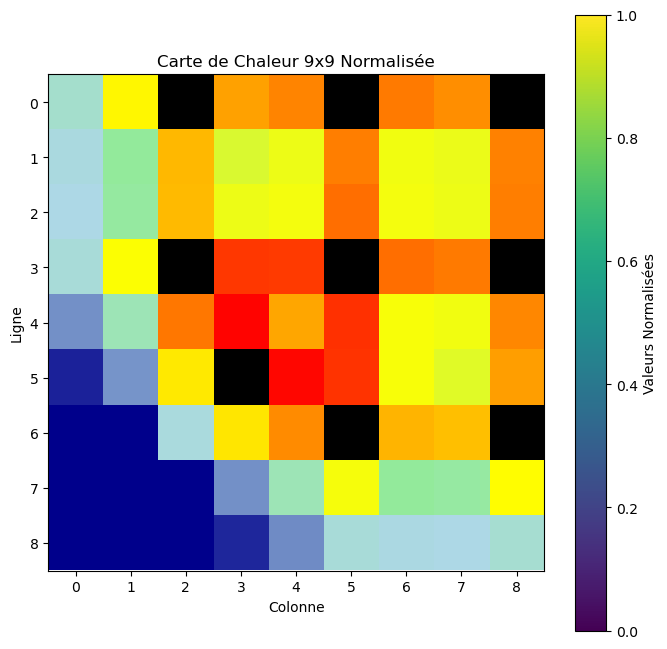

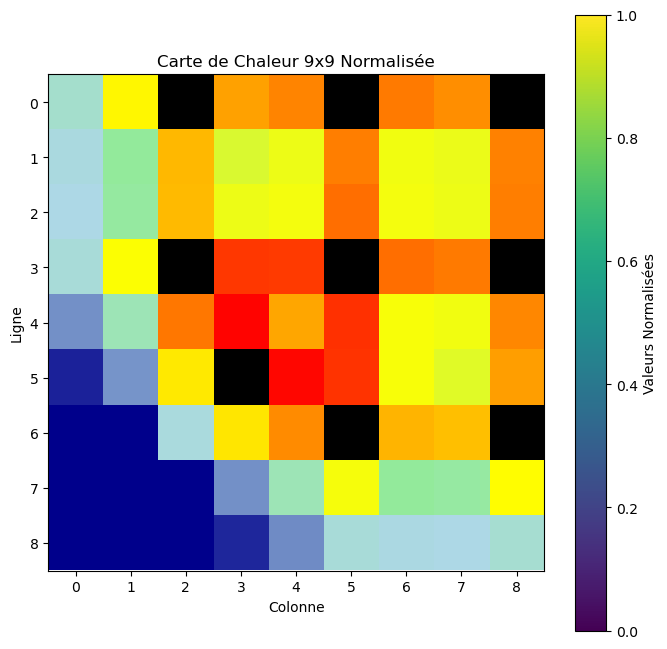

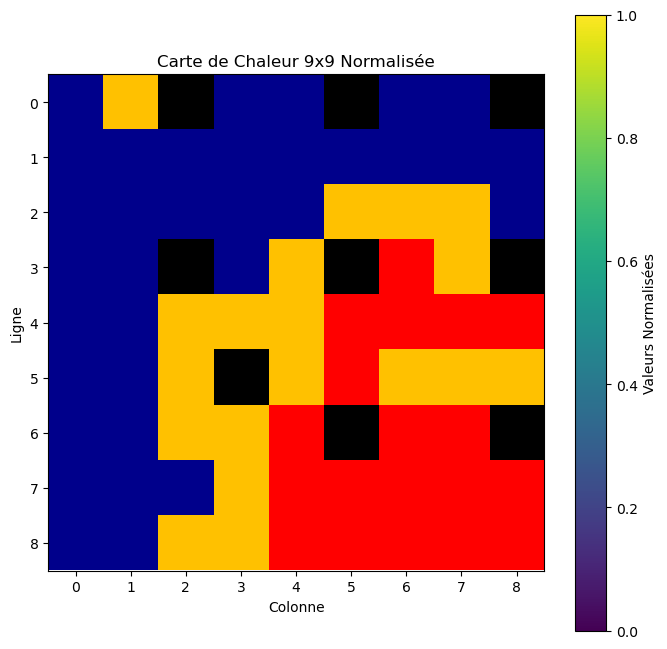

In [557]:
plot_pb('2A')

### Create Power RD list

In [ ]:
def power_result(pb_num):

    vera_result_list=power_dict[pb_num]
    n_cell_fuel = len(vera_result_list)
    power_result = np.zeros((n_cell_fuel,6))

    # Create power_result(x,y,my_result,my_result_sym,vera_result,rd)
    for index, vera_pos_result in enumerate(vera_result_list):
        x=vera_pos_result[0]
        y=vera_pos_result[1]
        my_result = power_cell(pb_num,'fuel',x,y)
        my_result_sym = power_cell(pb_num,'fuel',y,x)
        vera_result = vera_pos_result[2]
        power_result[index][0]=x
        power_result[index][1]=y
        power_result[index][2]=my_result
        power_result[index][3]=my_result_sym
        power_result[index][4]=vera_result

    power_result[:, 2] /= np.mean(power_result[:, 2]) 
    power_result[:, 3] /= np.mean(power_result[:, 3]) 
    power_result[:, 5] = (100*(power_result[:, 2]-power_result[:, 4])/power_result[:, 4])
    power_result[:, 2] = np.round(power_result[:, 2], decimals=4)
    power_result[:, 3] = np.round(power_result[:, 3], decimals=4)
    power_result[:, 5] = np.round(power_result[:, 5], decimals=2)
    return(power_result)

### Power table

In [ ]:
def power_table(pb_num):
    A=power_result(pb_num)
    # Initialize an empty DataFrame with index and columns from 8 to 0
    table = pd.DataFrame(index=range(8, -1, -1), columns=range(8, -1, -1), dtype=object)

    # Populate the DataFrame with values from power_result
    for row in A:
        i, j, value1, value2, value3, value4 = row
        table.at[j, i] = f"{value1}\n{value2}\n{value3}\n{value4}"  # Switched indices j, i

    # Fill NaN values with an empty string
    table.fillna('', inplace=True)

    # Create a PrettyTable instance
    pretty_table = PrettyTable()

    # Set column names (8 to 0)
    pretty_table.field_names = ["Row/Col"] + [str(j) for j in range(8, -1, -1)]

    # Add rows to the PrettyTable with horizontal lines
    for i in range(8, -1, -1):
        row = [str(i)]
        for j in range(8, -1, -1):
            cell_value = str(table.at[i, j])
            if cell_value == '':
                cell_value = ' '  # Replace empty cell with space for consistent width
            else:
                # Split the cell value to check each part separately
                parts = cell_value.split('\n')
                for idx, part in enumerate(parts):
                    if idx == 3:  # Append % symbol after the 4th value (index 3 in zero-based index)
                        parts[idx] = f"{part}%"  
                cell_value = '\n'.join(parts)
            row.append(cell_value)
        pretty_table.add_row(row)
        if i > 0:
            pretty_table.add_row(['-'*len(col) for col in pretty_table.field_names])  # Add horizontal line except for the last row
    return(pretty_table)

for pb_num in pb_num_list:
    print(pb_num,power_table('2B'))

### Maximum rd

In [ ]:
for pb_num in pb_num_list:
    print(pb_num,power_result(pb_num)[np.argmax(power_result(pb_num)[:, 5])][0],power_result(pb_num)[np.argmax(power_result(pb_num)[:, 5])][1],power_result(pb_num)[np.argmax(power_result(pb_num)[:, 5])][5])